In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
raw_data = pd.read_csv("Company_Data.csv")
raw_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
raw_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
raw_data['Sales'].nunique()

336

In [7]:
raw_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
raw_data.corr().style.background_gradient(cmap='coolwarm')

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


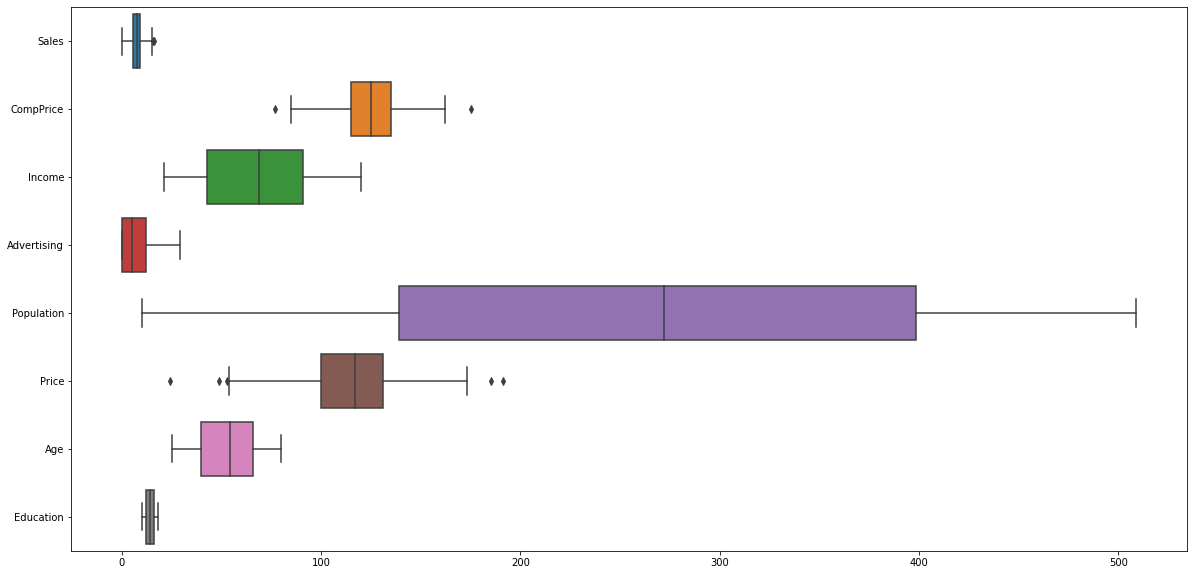

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(data=raw_data, orient="h")

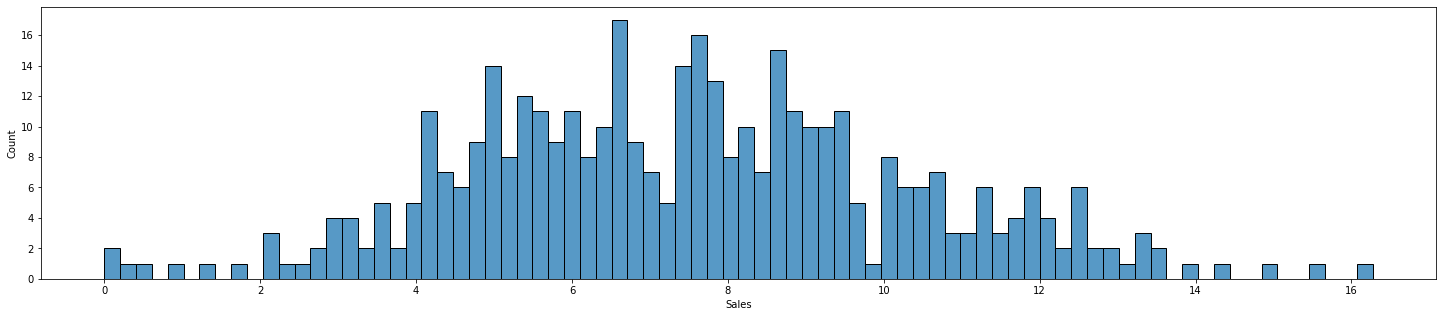

In [10]:
plt.figure(figsize=(25,5))
sns.histplot(data=raw_data, x='Sales', bins=80)

In [11]:
x = raw_data['Sales'].max()

In [12]:
print(x, x/2, x/3)

16.27 8.135 5.423333333333333


In [13]:
data=raw_data.copy()
data['Sales_cat'] = pd.cut(x = data['Sales'], bins = [0,5.424,8.2,16.3], labels=['Low','Medium','High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [14]:
print(data['Sales_cat'].value_counts())
print(data['Urban'].value_counts())
print(data['US'].value_counts())
print(data['ShelveLoc'].value_counts())

High      156
Medium    142
Low       102
Name: Sales_cat, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64
Yes    258
No     142
Name: US, dtype: int64
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [ ]:
#sns.pairplot(data=data, hue='Sales_cat')

In [15]:
df = data.drop('Sales',axis=1)
df = pd.get_dummies(df.iloc[:,:-1])
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [16]:
df['Sales_cat'] = data['Sales_cat']

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(df["Sales_cat"])
df['Sales_cat'] = le.transform(df["Sales_cat"])
#df['Sales_cat'] = le.fit_transform(df["Sales_cat"])
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_cat
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [23]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [24]:
df.shape, X.shape, Y.shape

((400, 15), (400, 14), (400, 1))

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7, stratify=Y)

In [28]:
rf_clf_1=RandomForestClassifier(n_estimators=100)
rf_clf_1.fit(X_train,Y_train)
Y_pred_1=rf_clf_1.predict(X_test)
Y_pred_train_1 = rf_clf_1.predict(X_train)

In [29]:
print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_1))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_1))
print(confusion_matrix(Y_test, Y_pred_1))
print(classification_report(Y_test, Y_pred_1))

Accuracy_train: 1.0
Accuracy_test: 0.6
[[36  3  8]
 [ 0 15 15]
 [15  7 21]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.73        47
           1       0.60      0.50      0.55        30
           2       0.48      0.49      0.48        43

    accuracy                           0.60       120
   macro avg       0.59      0.58      0.59       120
weighted avg       0.60      0.60      0.60       120



In [30]:
feature_imp_1 = pd.Series(rf_clf_1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_1

Price               0.184190
Age                 0.135250
Income              0.119248
CompPrice           0.102590
Population          0.099618
Advertising         0.095585
Education           0.073041
ShelveLoc_Good      0.058082
ShelveLoc_Bad       0.047922
ShelveLoc_Medium    0.024091
US_No               0.017365
US_Yes              0.015853
Urban_Yes           0.013698
Urban_No            0.013467
dtype: float64

In [31]:
rf_clf_2=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_clf_2.fit(X_train,Y_train)
Y_pred_2=rf_clf_2.predict(X_test)
Y_pred_train_2 = rf_clf_2.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_2))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_2))
print(confusion_matrix(Y_test, Y_pred_2))
print(classification_report(Y_test, Y_pred_2))

Accuracy_train: 1.0
Accuracy_test: 0.6083333333333333
[[38  3  6]
 [ 0 15 15]
 [15  8 20]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        47
           1       0.58      0.50      0.54        30
           2       0.49      0.47      0.48        43

    accuracy                           0.61       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.60      0.61      0.60       120



In [32]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(Y_train)
print('Before',counter)

smt = SMOTE(random_state=7)
X_train_smt, Y_train_smt = smt.fit_resample(X_train, Y_train)

counter = Counter(Y_train_smt)
print('After',counter)

Before Counter({'Sales_cat': 1})
After Counter({'Sales_cat': 1})


In [33]:
X_train.shape, Y_train.shape, X_train_smt.shape, Y_train_smt.shape

((280, 14), (280, 1), (327, 14), (327, 1))

In [34]:
Y_train.value_counts(), Y_train_smt.value_counts()

(Sales_cat
 0            109
 2             99
 1             72
 dtype: int64, Sales_cat
 0            109
 1            109
 2            109
 dtype: int64)

In [35]:
rf_clf_3=RandomForestClassifier(n_estimators=400)
rf_clf_3.fit(X_train_smt,Y_train_smt)
Y_pred_3=rf_clf_3.predict(X_test)
Y_pred_train_3 = rf_clf_3.predict(X_train_smt)

print("Accuracy_train:",metrics.accuracy_score(Y_train_smt, Y_pred_train_3))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_3))
print(confusion_matrix(Y_test, Y_pred_3))
print(classification_report(Y_test, Y_pred_3))

Accuracy_train: 1.0
Accuracy_test: 0.5916666666666667
[[37  4  6]
 [ 0 16 14]
 [14 11 18]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        47
           1       0.52      0.53      0.52        30
           2       0.47      0.42      0.44        43

    accuracy                           0.59       120
   macro avg       0.57      0.58      0.57       120
weighted avg       0.58      0.59      0.59       120



In [36]:
grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [7]
}

In [37]:
from sklearn.model_selection import GridSearchCV

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, Y_train)
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 7}

In [43]:
rf_clf_4=RandomForestClassifier(criterion= 'entropy',
                                max_depth= 5,
                                max_features= 'sqrt',
                                n_estimators= 100,
                                random_state= 7)
rf_clf_4.fit(X_train,Y_train)
Y_pred_4=rf_clf_4.predict(X_test)
Y_pred_train_4 = rf_clf_4.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_4))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_4))
print(confusion_matrix(Y_test, Y_pred_4))
print(classification_report(Y_test, Y_pred_4))

Accuracy_train: 0.9392857142857143
Accuracy_test: 0.6166666666666667
[[39  3  5]
 [ 0 15 15]
 [16  7 20]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        47
           1       0.60      0.50      0.55        30
           2       0.50      0.47      0.48        43

    accuracy                           0.62       120
   macro avg       0.60      0.60      0.60       120
weighted avg       0.61      0.62      0.61       120



In [44]:
rf_clf_5=RandomForestClassifier(criterion= 'entropy',
                                max_depth= 5,
                                max_features= 'sqrt',
                                n_estimators= 100,
                                random_state= 7)

rf_clf_5.fit(X_train_smt,Y_train_smt)
Y_pred_5=rf_clf_5.predict(X_test)
Y_pred_train_5 = rf_clf_5.predict(X_train_smt)

print("Accuracy_train:",metrics.accuracy_score(Y_train_smt, Y_pred_train_5))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_5))
print(confusion_matrix(Y_test, Y_pred_5))
print(classification_report(Y_test, Y_pred_5))

Accuracy_train: 0.9174311926605505
Accuracy_test: 0.6
[[36  4  7]
 [ 0 20 10]
 [15 12 16]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.73        47
           1       0.56      0.67      0.61        30
           2       0.48      0.37      0.42        43

    accuracy                           0.60       120
   macro avg       0.58      0.60      0.59       120
weighted avg       0.59      0.60      0.59       120



In [45]:
scores = cross_val_score(rf_clf_4, X, Y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.62 accuracy with a standard deviation of 0.04


In [41]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, Y_train)
rf_clf_6 = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = rf_clf_6, param_distributions = grid, n_iter =100, cv = cross_val,
                            verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

clf_random.fit(X_train,Y_train)
Y_pred_6=clf_random.predict(X_test)
Y_pred_train_6 = clf_random.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_6))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_6))
print(confusion_matrix(Y_test, Y_pred_6))
print(classification_report(Y_test, Y_pred_6))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy_train: 0.8642857142857143
Accuracy_test: 0.6
[[37  2  8]
 [ 0 14 16]
 [15  7 21]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        47
           1       0.61      0.47      0.53        30
           2       0.47      0.49      0.48        43

    accuracy                           0.60       120
   macro avg       0.60      0.58      0.58       120
weighted avg       0.60      0.60      0.60       120



In [42]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, Y_train)
rf_clf_7 = RandomForestClassifier()
clf_grid = GridSearchCV(estimator = rf_clf_7, param_grid = grid, cv = cross_val,
                            verbose=2, n_jobs = -1,scoring='roc_auc')

clf_grid.fit(X_train,Y_train)
Y_pred_7=clf_grid.predict(X_test)
Y_pred_train_7 = clf_grid.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_7))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_7))
print(confusion_matrix(Y_test, Y_pred_7))
print(classification_report(Y_test, Y_pred_7))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy_train: 0.8642857142857143
Accuracy_test: 0.6
[[37  2  8]
 [ 0 14 16]
 [15  7 21]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        47
           1       0.61      0.47      0.53        30
           2       0.47      0.49      0.48        43

    accuracy                           0.60       120
   macro avg       0.60      0.58      0.58       120
weighted avg       0.60      0.60      0.60       120

